In [ ]:
#TODO: Importation des bibliothèques nécessaires
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [ ]:

# Chargement et prétraitement des données CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalisation des pixels entre 0 et 1
y_train, y_test = to_categorical(y_train), to_categorical(y_test)  # Conversion des étiquettes en one-hot encoding

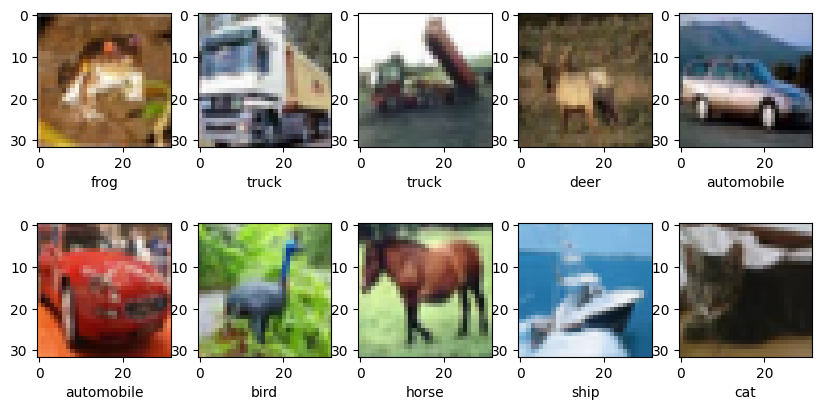

In [ ]:
# TODO:Noms des classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Affichage de quelques exemples avec leurs étiquettes
plt.figure(figsize=(10, 5))
 # TODO: Afficher 10 exemples
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i].argmax()])
plt.show()

In [ ]:
# TODO:Définition du modèle CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


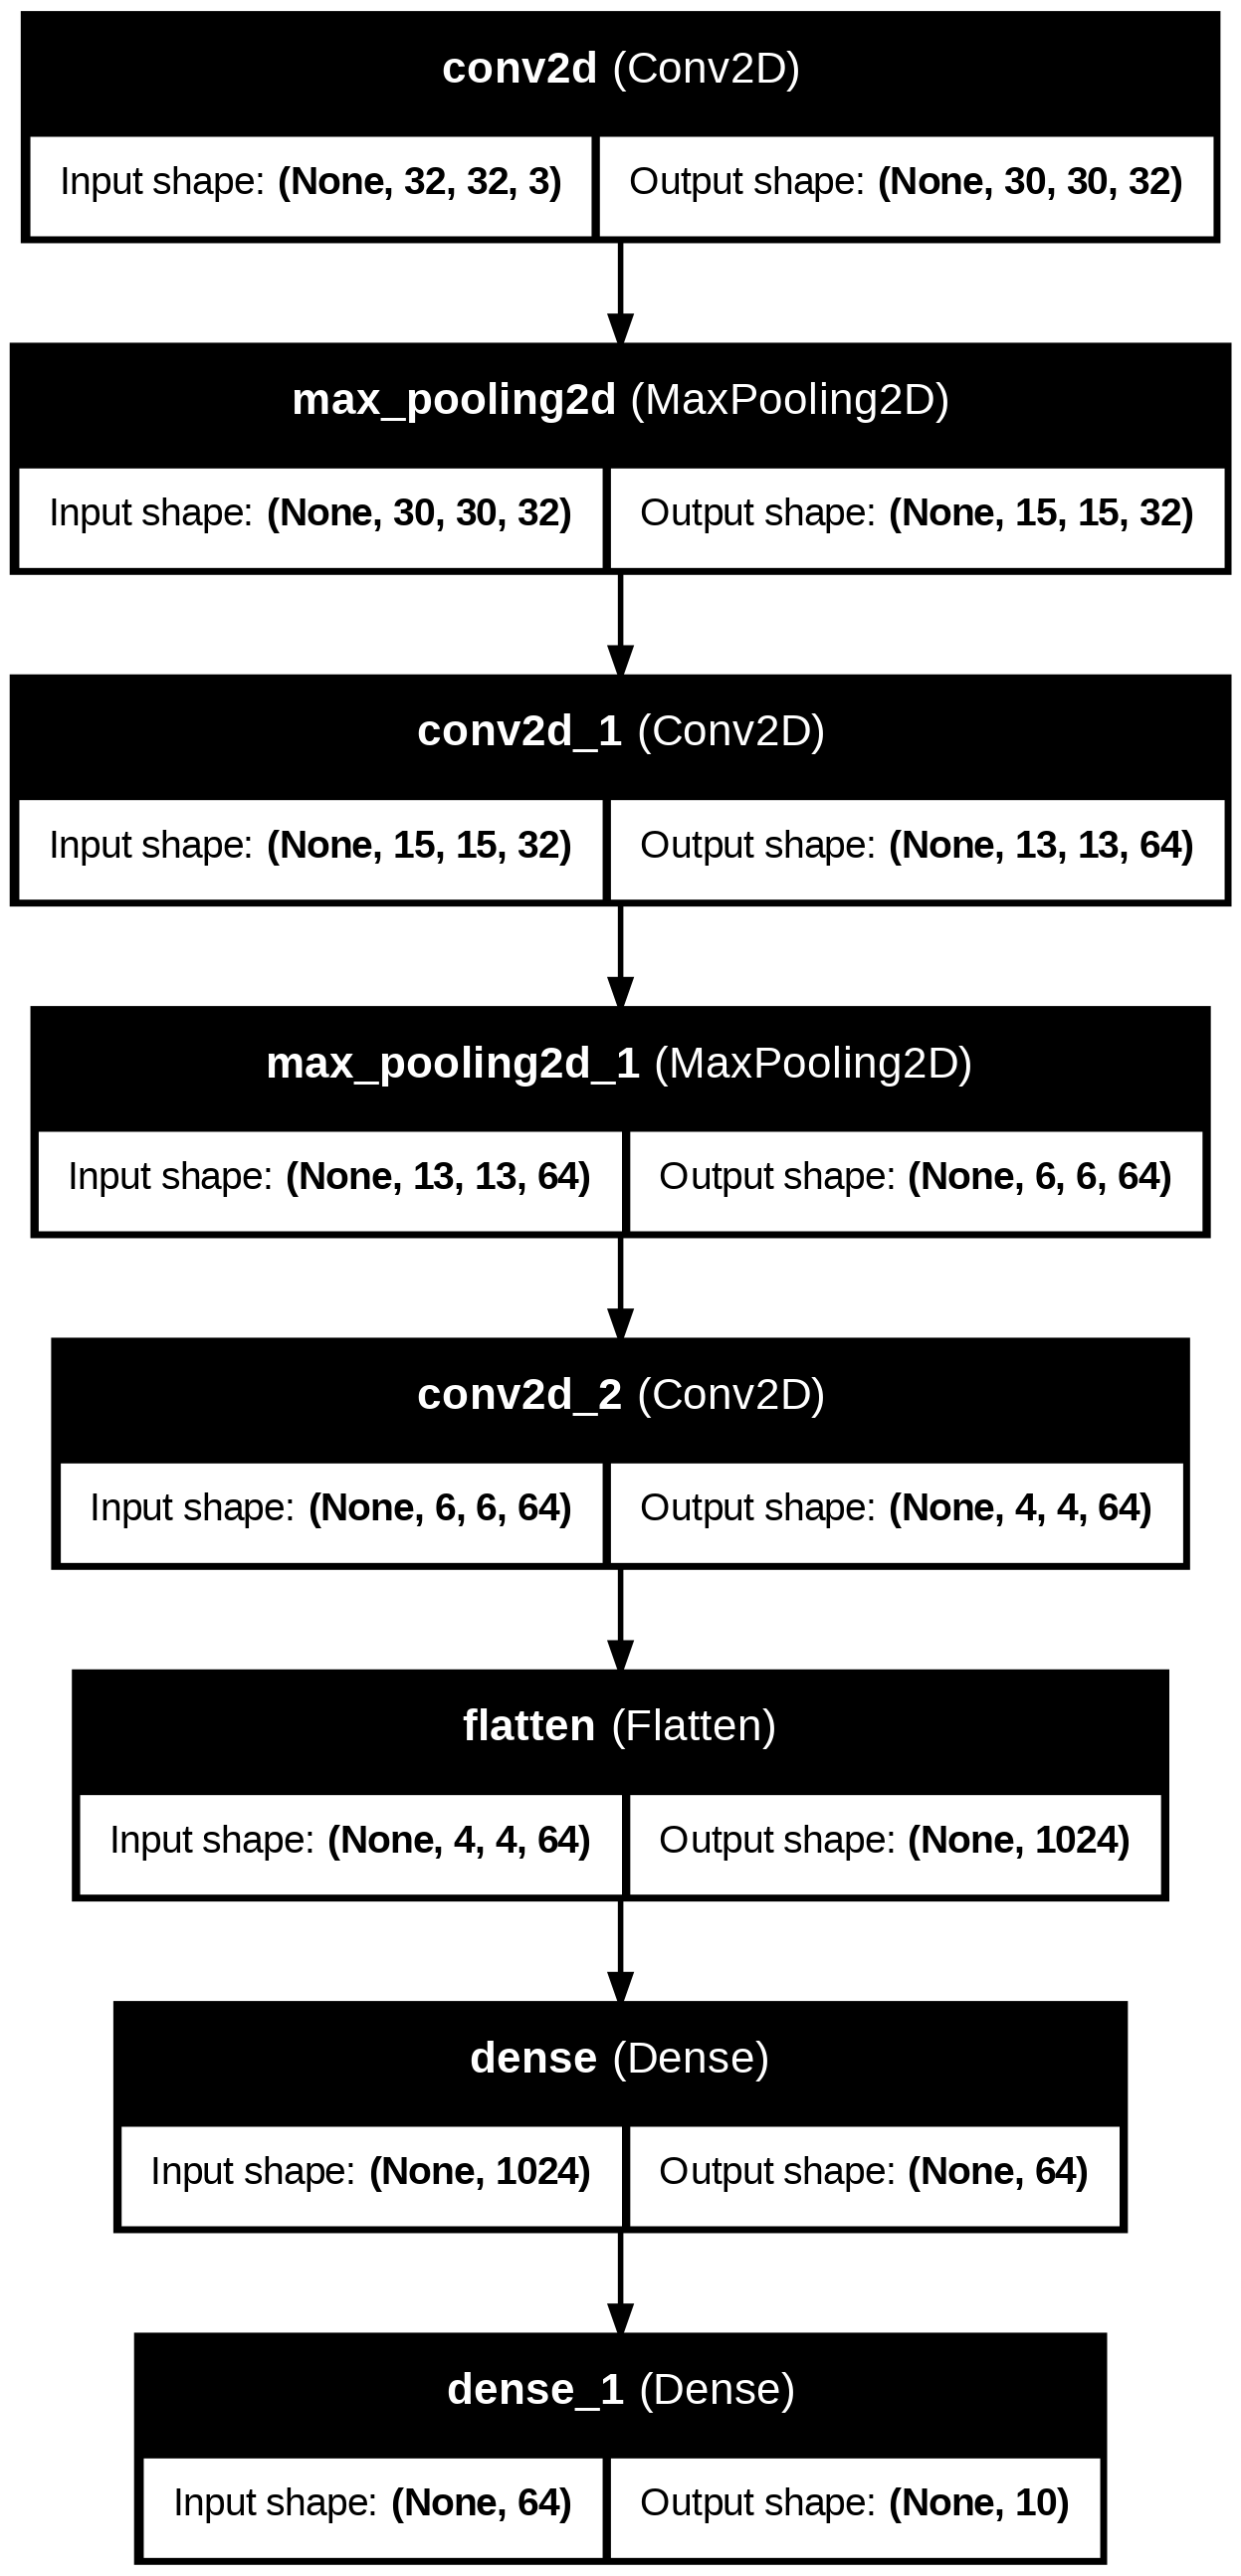

In [ ]:
from tensorflow.keras.utils import plot_model
# TODO:affichage et Enregistrement d'une image du modèle
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


In [ ]:
# TODO:Compilation du modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# TODO:Callback pour enregistrer le meilleur modèle
from tensorflow.keras.callbacks import ModelCheckpoint

# Callback to save the best model
checkpoint_filepath = 'best_model.keras'
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,          # Filepath to save the model
    monitor='val_loss',                    # Metric to monitor (e.g., validation loss)
    save_best_only=True,                   # Save only the best model
    mode='min',                            # Mode 'min' for minimizing the monitored metric
    verbose=1,
    # Verbosity level (1 for progress messages)
)


In [ ]:
# TODO: Entraînement du modèle avec le callback ModelCheckpoint

history=model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test),callbacks=[model_checkpoint])




Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7810 - loss: 0.6378
Epoch 1: val_loss improved from inf to 0.90562, saving model to best_model.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7810 - loss: 0.6378 - val_accuracy: 0.6979 - val_loss: 0.9056
Epoch 2/10
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7916 - loss: 0.5926
Epoch 2: val_loss did not improve from 0.90562
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7916 - loss: 0.5926 - val_accuracy: 0.6996 - val_loss: 0.9157
Epoch 3/10
1549/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8016 - loss: 0.5637
Epoch 3: val_loss did not improve from 0.90562
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8016 - loss: 0.5638 - val_accuracy: 0.6953 - val_loss: 0.9426
Epoch 4/10
1551/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8151 - loss: 0.5195
Epoch 4: val_loss did not improve from 0.90562
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8150 - loss:

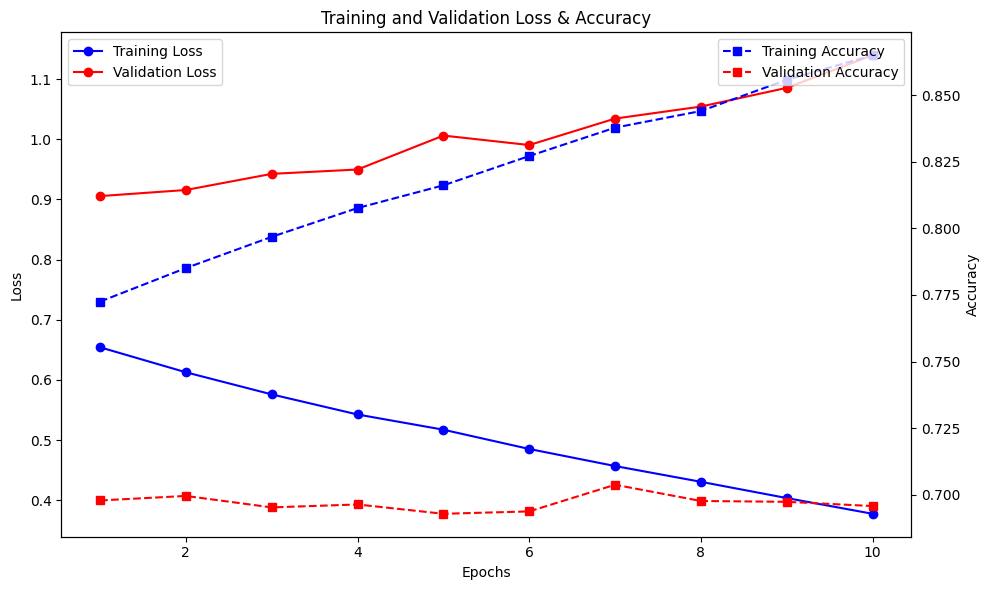

In [ ]:
# TODO:Affichage les courbes de l'historique d'entraînement
import matplotlib.pyplot as plt

def plot_combined_history(history):
    # Extract the metrics from the history object
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history.get('accuracy')
    val_accuracy = history.history.get('val_accuracy')

    epochs = range(1, len(loss) + 1)

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot Loss on the primary y-axis
    ax1.plot(epochs, loss, 'bo-', label='Training Loss')
    ax1.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Validation Loss & Accuracy')
    ax1.legend(loc='upper left')

    # Create a secondary y-axis for Accuracy
    ax2 = ax1.twinx()
    if accuracy is not None and val_accuracy is not None:
        ax2.plot(epochs, accuracy, 'bs--', label='Training Accuracy')
        ax2.plot(epochs, val_accuracy, 'rs--', label='Validation Accuracy')
        ax2.set_ylabel('Accuracy')
        ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Usage example after training
plot_combined_history(history)



In [ ]:
# TODO: Évaluation du modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Accuracy on test set: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6958 - loss: 1.1221
Accuracy on test set: 0.6958000063896179


# **PARTIE TEST**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7003 - loss: 0.8955
Test accuracy: 0.6978999972343445
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


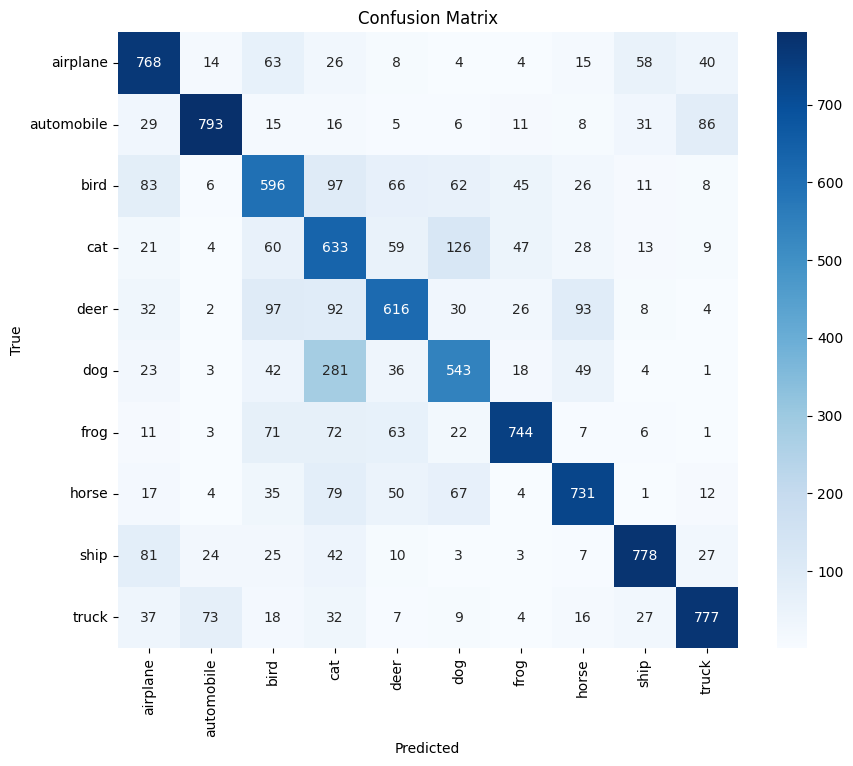

              precision    recall  f1-score   support

    airplane       0.70      0.77      0.73      1000
  automobile       0.86      0.79      0.82      1000
        bird       0.58      0.60      0.59      1000
         cat       0.46      0.63      0.53      1000
        deer       0.67      0.62      0.64      1000
         dog       0.62      0.54      0.58      1000
        frog       0.82      0.74      0.78      1000
       horse       0.75      0.73      0.74      1000
        ship       0.83      0.78      0.80      1000
       truck       0.81      0.78      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# TODO: Chargement et prétraitement des données CIFAR-10
(_, _), (x_test, y_test) = cifar10.load_data()

# TODO: Normalisation des pixels entre 0 et 1
x_test = x_test / 255.0

# TODO: Conversion des étiquettes en one-hot encoding
y_test = to_categorical(y_test)

# TODO: Chargement du modèle pré-entraîné
model = load_model('best_model.keras')

# TODO: Noms des classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# TODO: Évaluation du modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# TODO: Prédictions sur les données de test
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# TODO: Matrice de confusion
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# TODO: Affichage de la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Rapport de classification
print(classification_report(y_true, y_pred_classes, target_names=class_names))

